In [1]:
# Import Dependencies
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
from dotenv import load_dotenv
import os
from datetime import datetime
from MCForecastTools import MCSimulation
import requests
import pandas_datareader as pdr
%matplotlib inline

In [2]:
# Function to Validate Tickers
def validateTick(tick):
    
    # Try Inputting into Yahoo Stocks
    try:
        pdr.DataReader(f'{tick}','yahoo',date)
    
    # Raise Error if Invalid
    except:
        raise ValueError("Ticker Not Valid.")
        
# Function to Validate Date
def validate(date_text):
    
    # Try Check on Format
    try:
        datetime.strptime(date_text, '%Y-%m-%d')
        
    # Raise Error if Invalid
    except ValueError:
        raise ValueError("Incorrect data format, should be YYYY-MM-DD")

In [3]:
# Set Empty Dictionary
stock_dict = {}

# Set Empty List
stock_list = []

# Pick a Start Date
date = input("Pick a start date for your analysis (YYYY-MM-DD): ")
validate(date)

# While Loop to Pick Stocks
while (True):
    name = input("Add a stock ticker to the list: ").upper()
    validateTick(name)
    stock_dict[name] = date
    stock_list.append(name)
    cont = input("Press 'y' to Add Another Stock, press 'Enter' to exit")
    if cont == "":
        break;

Pick a start date for your analysis (YYYY-MM-DD):  2015-01-01
Add a stock ticker to the list:  C
Press 'y' to Add Another Stock, press 'Enter' to exit y
Add a stock ticker to the list:  G
Press 'y' to Add Another Stock, press 'Enter' to exit y
Add a stock ticker to the list:  MSFT
Press 'y' to Add Another Stock, press 'Enter' to exit y
Add a stock ticker to the list:  EBAY
Press 'y' to Add Another Stock, press 'Enter' to exit 


In [4]:
# Function to Create Stocks
def stockCreation(stock_dict, stock_list):
    
    # Create Empty List
    func_list = []

    # For Loop to Iterate through Stocks
    for key, value in stock_dict.items():
        
        # Collect Stock Data
        globals()[key] = pdr.DataReader(f'{key}','yahoo',value)
        
        # Assign Column Values
        globals()[key].columns = [[key, key, key, key, key, key,],["high", "low", "open", "close", "volume", "adj_close"]]

        # Append Each Stock into func_list
        func_list.append(globals()[key])
    
    # Set First Portfolio
    portfolio = func_list[0]
    
    # Create Portfolio Based on Number of Stocks
    if len(func_list) == 2:
        portfolio = portfolio.merge(func_list[1], left_index=True, right_index=True, suffixes=[f'_{stock_list[0]}', f'_{stock_list[1]}'])
    elif len(func_list) > 2:
        portfolio = portfolio.merge(func_list[1], left_index=True, right_index=True)
        for x in range(len(func_list)-2):
            portfolio = portfolio.merge(func_list[x + 2], left_index=True, right_index=True)
            
    # Create Empty List
    portfolio_close = []
    
    # Append Close Values to New List
    for x in range(len(stock_list)):
        portfolio_close.append(portfolio[stock_list[x]][f"adj_close"])
    
    # Create DataFrame from New List
    portfolio_close = pd.DataFrame(portfolio_close)
    
    # Transpose DataFrame
    portfolio_close = portfolio_close.T
    
    # Assign Column Names
    portfolio_close.columns = stock_list
        
    # Return Both DataFrames
    return portfolio, portfolio_close

In [5]:
# Call Function Above to Save Full Portfolio
portfolio = stockCreation(stock_dict, stock_list)[0]

# Show DataFrame
portfolio

C                                                          \
                 high        low       open      close      volume  adj_close   
Date                                                                            
2015-01-02  54.689999  53.790001  54.360001  54.259998  11137800.0  48.313530   
2015-01-05  53.959999  52.330002  53.910000  52.549999  20945400.0  46.790939   
2015-01-06  52.770000  50.529999  52.680000  50.700001  31989300.0  45.143681   
2015-01-07  51.549999  50.619999  51.509998  51.169998  27890800.0  45.562168   
2015-01-08  52.080002  51.500000  51.770000  51.939999  17467200.0  46.247784   
...               ...        ...        ...        ...         ...        ...   
2020-12-07  58.610001  57.279999  58.150002  58.130001  21280900.0  58.130001   
2020-12-08  58.400002  57.360001  57.480000  58.360001  15511700.0  58.360001   
2020-12-09  59.549999  58.299999  59.160000  58.950001  27278200.0  58.950001   
2020-12-10  60.790001  58.009998  58.040001  60.500000  25866600.0  60.500000   
2020-12-11  59.810001  58.180000  59.799999  58.930000  20953100.0  58.930000   

                    G                                   ...        MSFT  \
                 high        low       open      close  ...        open   
Date                                                    ...               
2015-01-02  19.170000  18.750000  19.040001  18.900000  ...   46.660000   
2015-01-05  18.990000  18.510000  18.770000  18.870001  ...   46.369999   
2015-01-06  19.139999  18.820000  18.850000  19.090000  ...   46.380001   
2015-01-07  19.230000  18.920000  19.200001  19.200001  ...   45.980000   
2015-01-08  19.700001  19.340000  19.430000  19.660000  ...   46.750000   
...               ...        ...        ...        ...  ...         ...   
2020-12-07  40.980000  40.470001  40.830002  40.680000  ...  214.369995   
2020-12-08  41.040001  40.369999  40.400002  40.900002  ...  213.970001   
2020-12-09  41.200001  40.639999  41.000000  40.950001  ...  215.160004   
2020-12-10  41.139999  40.470001  40.770000  40.860001  ...  211.770004   
2020-12-11  40.730000  40.230000  40.549999  40.380001  ...  210.050003   

                                                     EBAY             \
                 close      volume   adj_close       high        low   
Date                                                                   
2015-01-02   46.759998  27913900.0   41.539135  23.922560  23.455387   
2015-01-05   46.330002  39673900.0   41.157158  23.670034  23.274410   
2015-01-06   45.650002  36447900.0   40.553074  23.484848  23.017677   
2015-01-07   46.230000  29114100.0   41.068310  23.350168  22.912458   
2015-01-08   47.590000  29645200.0   42.276463  23.745790  23.274410   
...                ...         ...         ...        ...        ...   
2020-12-07  214.289993  24620000.0  214.289993  51.009998  49.910000   
2020-12-08  216.009995  23284100.0  216.009995  50.230000  49.279999   
2020-12-09  211.800003  32440600.0  211.800003  50.180000  49.220001   
2020-12-10  210.520004  26733300.0  210.520004  49.840000  48.930000   
2020-12-11  213.259995  30972600.0  213.259995  49.610001  48.669998   

                                                         
                 open      close      volume  adj_close  
Date                                                     
2015-01-02  23.728956  23.657408  14021200.0  22.975092  
2015-01-05  23.505892  23.459597  17694000.0  22.782984  
2015-01-06  23.484848  23.156565  22926700.0  22.488691  
2015-01-07  23.223906  23.118687  21981500.0  22.451908  
2015-01-08  23.278620  23.741583  24326400.0  23.056841  
...               ...        ...         ...        ...  
2020-12-07  50.910000  50.029999   5132200.0  50.029999  
2020-12-08  49.910000  49.889999   7091500.0  49.889999  
2020-12-09  49.959999  49.500000   6794500.0  49.500000  
2020-12-10  49.400002  49.599998   4344000.0  49.599998  
2020-12-11  49.439999  49.130001   4549500.0  49.130001  

[1498 rows x

In [6]:
# Call Function Above to Save Portfolio Close Values
portfolio_close = stockCreation(stock_dict, stock_list)[1]

# Show DataFrame
portfolio_close

,C,G,MSFT,EBAY
Date,,,,
2015-01-02,48.313530,18.199549,41.539135,22.975092
2015-01-05,46.790939,18.170660,41.157158,22.782984
2015-01-06,45.143681,18.382507,40.553074,22.488691
2015-01-07,45.562168,18.488430,41.068310,22.451908
2015-01-08,46.247784,18.931385,42.276463,23.056841
...,...,...,...,...
2020-12-07,58.130001,40.582001,214.289993,50.029999
2020-12-08,58.360001,40.900002,216.009995,49.889999
2020-12-09,58.950001,40.950001,211.800003,49.500000


# Monte Carlo Simulation

### Definition: Computational algorithms that rely on repeated random sampling to obtain numerical results. 

### Purpose: The underlying concept is to use randomness to solve problems that might be deterministic in principle.

In [7]:
# Select Number of Years for Monte Carlo Simulation
num_years = int(input("How many years do you want to run the Monte Carlo Simulation for?"))

# Select Number of Simulations for Monte Carlo Simulation
sims = int(input("How many simulations would you like to run?"))

# Create Monte Carlo Object
MC = MCSimulation(
        portfolio_data = portfolio,
        weights = np.full((1,len(portfolio_close.columns)), 1/len(portfolio_close.columns))[0].tolist(),
        num_simulation = sims,
        num_trading_days = 252*num_years
    )

# Run Monte Carlo Simulation
cumu_return = MC.calc_cumulative_return()

How many years do you want to run the Monte Carlo Simulation for? 10
How many simulations would you like to run? 1000


Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

### Each line represents one simulation of possible outcomes of this portfolio.

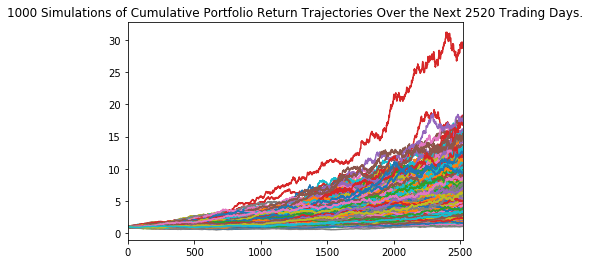

In [8]:
# Create Plot Simulation
line_plot = MC.plot_simulation();

# Save Plot Simulation
line_plot.figure.savefig(f"Images/MC_plot_simulation.png", bbox_inches='tight')

### Before moving on: Is a high volatile or low volatile outcome more likely?
 
### This graph represents the distribution of returns across all the simulations.

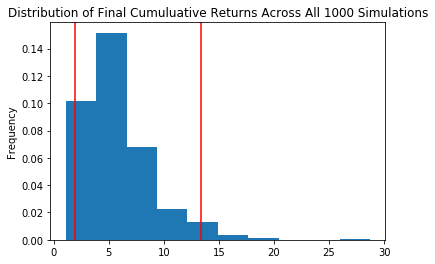

In [9]:
# Create Plot Distribution
plot_dist = MC.plot_distribution();

# Save Plot Distribution
plot_dist.figure.savefig(f"Images/MC_plot_distribution.png", bbox_inches='tight')

### Does the distribution shown above match expectations to your previous answer of volatility?

In [10]:
# Create Cumulative Return Table
tbl = MC.summarize_cumulative_return()

# Select Initial Investment
initial_investment = int(input("Input the amount of money you'd like to forecast in this analysis: $"))

# Set Lower Confidence Interval
ci_lower = round(tbl[8]*initial_investment,2)

# Set Upper Confidence Interval
ci_upper = round(tbl[9]*initial_investment,2)

# Print Results
print(f"""

There is a 95% chance that an initial investment of ${initial_investment} in the portfolio
over the next {num_years} years will end within in the range of ${ci_lower} and ${ci_upper}""")

Input the amount of money you'd like to forecast in this analysis: $ 1000




There is a 95% chance that an initial investment of $1000 in the portfolio
over the next 10 years will end within in the range of $1890.99 and $13388.53


### These projections are based on the lower and upper confidence intervals.

# Rolling Statistics

## Definition: Looking at rolling statistics gives performance results that are smoothed over defined periods throughout its history. 

## Purpose: To create a more accurate picture than a single snapshot of one period.

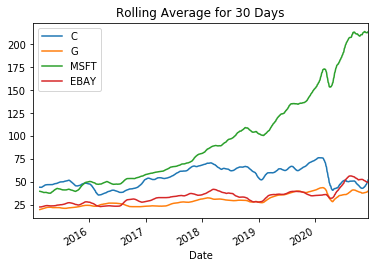

In [11]:
# Find Rolling Mean
rollingmean = portfolio_close.rolling(window=30).mean()

# Plot Rolling Mean
rollingmeanplot = rollingmean.plot(title='Rolling Average for 30 Days');

# Save Figure
rollingmeanplot.figure.savefig(f"Images/rollingmeansplot.png", bbox_inches='tight')

## Taking the 30 day rolling average smoothes the graphs and makes it easier to see overall trends. Based on the rolling average, would you change your previous answers?

## The Standard Deviation (STD) is a measure of the volatility of a stock.  It can be calculated as a single statistic for an entire dataset.  The higher the STD, the more volatile a stock.

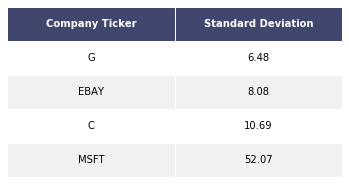

In [12]:
# Calculate STD
overallstd = round(portfolio_close.std().sort_values(),2)

# Create DataFrame
overallstd = pd.DataFrame(overallstd)

# Reset Index
overallstd = overallstd.reset_index()

# Assign Column Names
overallstd.columns = ["Company Ticker", "Standard Deviation"]

# Function to Convert DataFrame as Image
def render_table(data, col_width=3.0, row_height=0.625, font_size=10,
                     header_color='#40466E', row_colors=['#F1F1F2', 'w'], edge_color='w',
                     bbox=[0, 0, 1, 1], header_columns=0,
                     ax=None, **kwargs):
    if ax is None:
        size = (np.array(data.shape[::-1]) + np.array([0, 1])) * np.array([3.0, row_height])
        fig, ax = plt.subplots(figsize=size)
        ax.axis('off')
    mpl_table = ax.table(cellText=data.values, bbox=bbox, colLabels=data.columns, cellLoc='center', **kwargs)
    mpl_table.auto_set_font_size(False)
    mpl_table.set_fontsize(font_size)
    for k, cell in mpl_table._cells.items():
        cell.set_edgecolor(edge_color)
        if k[0] == 0 or k[1] < header_columns:
            cell.set_text_props(weight='bold', color='w')
            cell.set_facecolor(header_color)
        else:
            cell.set_facecolor(row_colors[k[0]%len(row_colors) ])
    return ax.get_figure(), ax

# Call Function to Convert DataFrame
fig,ax = render_table(overallstd, header_columns=0, col_width=2.0)

# Save STD Figure
fig.savefig("Images/std.png")

## Based on this statistic, what can you say about the volatility of your stocks?

## The Rolling STD looks at changes in volatility over time.

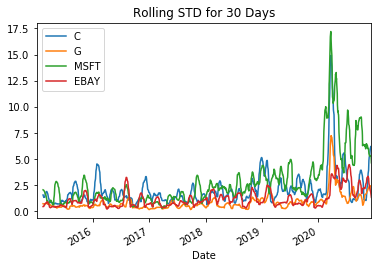

In [13]:
# Find Rolling STD for 30 Days
rollingstd = portfolio_close.rolling(window=30).std()

# Plot Rolling STD
rollingstdplot = rollingstd.plot(title='Rolling STD for 30 Days');

# Save Figure
rollingstdplot.figure.savefig(f"Images/rollingstdplot.png", bbox_inches='tight')

## Based on this plot, how would you describe the volatility of your stocks?  Are some more volatile than others?  Do they have periods of higher and lower volatility?  What could influence these?

# Performance Analysis

## Purpose: To check a stock's performance we look at the historical prices in time. However; in order to understand its performance, there should be a comparison with other company stocks or general market trends. Prices can not be used to compare different companies; therefore, returns in percentage are calculated to have a meaningful comparison and performance analysis. 

## Daily Return
### Looking at the daily returns of stocks helps to see daily performance comparisons. 

In [14]:
# Function to Find Company Name from Ticker
def get_symbol(symbol):
    
    # URL to Yahoo Stocks
    url = "http://d.yimg.com/autoc.finance.yahoo.com/autoc?query={}&region=1&lang=en".format(symbol)
    
    # Get JSON Request
    result = requests.get(url).json()
    
    # Save Result for Each Company
    for x in result['ResultSet']['Result']:
        if x['symbol'] == symbol:
            return x['name']

This graph shows the daily percent changes of:
Citigroup Inc.
Genpact Limited
Microsoft Corporation
eBay Inc.


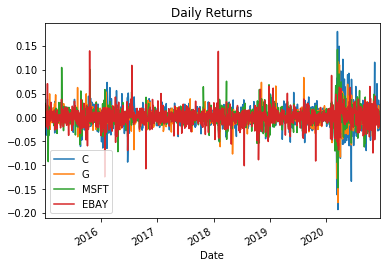

In [15]:
# Print Company Names
print(f"This graph shows the daily percent changes of:")
for x in range(len(stock_list)):
    print(f"{get_symbol(stock_list[x])}")

# Find Daily Returns
stock_performance = portfolio_close.pct_change().dropna()

# Plot Daily Returns
stock_performance_plt = stock_performance.plot.line(title = "Daily Returns")

# Save Figure
stock_performance_plt.figure.savefig(f"Images/daily_returns.png", bbox_inches='tight')

# Show Plot
stock_performance_plt;

## What can you see and infer from the daily returns graph? 

## Volatility
### The greater the volatility, the wider the range of prices/returns. High volatility means that the price of the asset can change dramatically over a short time period of time in either direction. A lower volatility means the asset's value does not fluctuate as dramatically. Instead its value tends to change at a steady pace.

### Risk
### In addition to statistical calculation of risk, you may also have an idea from a plot. The greater the volatility, the bigger the risk.

## Cumulative Return

### A cumulative return on an investment is the aggregate amount that the investment has gained or lost over time, in a time period. 

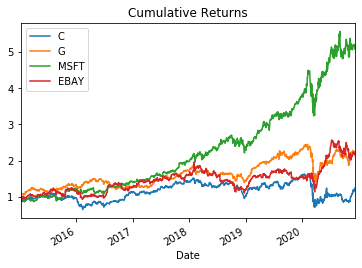

In [16]:
# Find Cumulative Return
stock_performance_cum = (1+stock_performance).cumprod()

# Plot Cumulative Return
stock_performance_cum_plt = stock_performance_cum.plot.line(title="Cumulative Returns")

# Save Figure
stock_performance_cum_plt.figure.savefig(f"Images/cumulative_returns.png", bbox_inches='tight')

# Show Plot
stock_performance_cum_plt;

## What can you see and infer from the cumulative returns graph? 

## Looking at the cumulative return of stocks helps to see general performance comparison in a timespan. 

## Do not forget that this is a past performance analysis graph, not future! 

## Investment Return

### This graph shows aggregated returns for a longer time period that shows overall performance of a stock.

## Simple calculation:

### Starting from the defined date, you can see what happened to you $100 investment in time. Do not forget that stocks that have higher cumulative return are tend to have bigger volatility (risk). 


# Exponentially Weighted Moving Average (EWMA)

## Definition: A view of the average price (open, close, mean) of a stock that gives more weight to the more recent values of the asset.  

## Purpose: The EWMA of a stock can be used as a condfidence indiacator, meaning that a strong but declining stock should have a hard time moving below the EWMA. EWMA can help you to determine what actions to take with an asset depending on its relative position to the close price. 

In [17]:
# Assign Close Values
df = portfolio_close

# Create Exponentially Weighted Moving Average Function
def ewmas(df, win, keepSource):

    # Make Copy of DataFrame
    df_temp = df.copy()

    #Change Names of Columns
    columnNames = list(df_temp.columns.values).copy()
    
    # Make Copy of DataFrame
    removeNames = columnNames.copy()
    
    # Assign Count Variable to Zero
    i = 0
    
    # Initiate each Column in columnNames
    for col in columnNames:

        # Make New Names for EWMAs
        ewmaName = columnNames[i] + '_EWMA' + str()   

        # Add EWMAs
        df_temp[ewmaName] = df[columnNames[i]].ewm(halflife=21).std()

        # Increase Count Variable
        i = i + 1

    # Remove Estimates with Insufficient Window Length
    df_temp = df_temp.iloc[win:]

    # Remove or Keep Source Data
    if keepSource == False:
        df_temp = df_temp.drop(removeNames,1)

    # Return DataFrame
    return df_temp

# Save DataFrame Created from EWMA Function
df_new = ewmas(df = df, win = 2, keepSource = True)

# Show DataFrame
df_new.tail()

,C,G,MSFT,EBAY,C_EWMA,G_EWMA,MSFT_EWMA,EBAY_EWMA
Date,,,,,,,,
2020-12-07,58.130001,40.582001,214.289993,50.029999,5.901912,2.122722,7.654095,3.133010
2020-12-08,58.360001,40.900002,216.009995,49.889999,6.032014,2.110210,7.564571,3.086466
2020-12-09,58.950001,40.950001,211.800003,49.500000,6.169389,2.097890,7.440870,3.045035
2020-12-10,60.500000,40.860001,210.520004,49.599998,6.362659,2.082268,7.324020,3.002517
2020-12-11,58.930000,40.380001,213.259995,49.130001,6.452401,2.056409,7.207792,2.967263


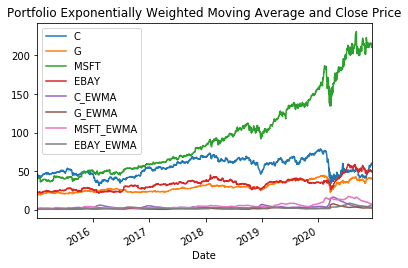

In [18]:
# Plot EWMA DataFrame
ewma_plot = df_new.plot(title='Portfolio Exponentially Weighted Moving Average and Close Price');

# Save Figure
ewma_plot.figure.savefig(f"Images/ewma.png", bbox_inches='tight')

## Using Exponentially Weighted Moving Average with overlapping closing prices, what would be your action for the assets in the portfolio you created? 

# Risk Analysis

## Definition: Looking at individual assets, risk and return can be directly correlated. Often as risk increases the opportunity for a large return will also increase, but also a large loss. Looking at an entire portfolio a more risk adverse portfolio will be diverse and have stocks or assets that do not directly correlate with each other. 

## Purpose: Risk Analysis is a good tool to weigh the risk versus return for an entire portfolio or a single asset or security. 

In [19]:
# Assign Weights
weights = np.full((1,len(portfolio_close.columns)), 1/len(portfolio_close.columns))[0].tolist()

#Calculate the Daily Returns of Portfolio
portfolio_returns = portfolio_close.pct_change()

# Drop NA's
portfolio_returns = portfolio_returns.dropna().copy()

# Show Portfolio
portfolio_returns.head(10)

,C,G,MSFT,EBAY
Date,,,,
2015-01-05,-0.031515,-0.001587,-0.009196,-0.008362
2015-01-06,-0.035205,0.011659,-0.014677,-0.012917
2015-01-07,0.009270,0.005762,0.012705,-0.001636
2015-01-08,0.015048,0.023958,0.029418,0.026943
2015-01-09,-0.022333,0.002035,-0.008405,-0.013827
2015-01-12,-0.007877,0.012690,-0.012503,-0.007730
2015-01-13,-0.007146,0.004010,-0.005150,-0.001268
2015-01-14,-0.019392,0.000499,-0.008628,-0.019953
2015-01-15,-0.037105,0.007485,-0.010444,-0.018693


In [20]:
#Calculate the Average Return for Each Stock
portfolio_returns_avg_rtn = portfolio_returns.mean()

# Show Average Returns
portfolio_returns_avg_rtn

C       0.000387
G       0.000671
MSFT    0.001248
EBAY    0.000672
dtype: float64

In [21]:
# Assign Allocated Daily Returns
allocated_daily_returns = (weights * portfolio_returns_avg_rtn)

# Take Sum of Returns
portfolio_return_pct = np.sum(allocated_daily_returns)

# Print Analysis
print(f"""
The average daily percent return of the portfolio is {round(portfolio_return_pct*100,2)}%""")


The average daily percent return of the portfolio is 0.07%


In [22]:
# #Add Daily Returns to DataFrame 
portfolio_returns['portfolio_daily_returns'] = portfolio_returns.dot(weights)

# #Calculate Cumulative Returns
Cumulative_returns_daily = (1+portfolio_returns).cumprod()

In [23]:
# Assign Sum of Returns
returns_sum = Cumulative_returns_daily['portfolio_daily_returns'].sum()

# Assign Portfolio
covariance_portfolio = portfolio_returns.iloc[:,:-1]

# Take Covariance of the Portfolio
covariance_portfolio = (covariance_portfolio.cov())*252

#Calculate Variance and Risk
portfolio_variance = np.dot(weights,np.dot(covariance_portfolio, weights))

#Standard Deviation (Risk of Portfolio)
portfolio_risk = np.sqrt(portfolio_variance)

# Print Analysis
print(f"""This portfolio has a return of {round(returns_sum - 100,2)}% 
and a risk of {round(portfolio_risk *100, 2)}%.""")

This portfolio has a return of 2332.8% 
and a risk of 22.96%.


### Knowing the risk and return of this portfolio, how would you optimize it or change it to reduce risk or increase return? 

In [24]:
#Calculate Annual Volatility
ann_volatility = portfolio_close.pct_change().apply(lambda x: np.log(1+x)).std().apply(lambda x: x*np.sqrt(250))

# Show Results
for x in range(len(ann_volatility)):
    
    print(f"The Annual Volatility for {get_symbol(stock_list[x])} is {round(ann_volatility[x],2)}")

The Annual Volatility for Citigroup Inc. is 0.36
The Annual Volatility for Genpact Limited is 0.26
The Annual Volatility for Microsoft Corporation is 0.28
The Annual Volatility for eBay Inc. is 0.29


In [25]:
#Calculate Portfolio Variance and volatility
portfolio_variance = np.dot(weights,np.dot(covariance_portfolio, weights))

#Calculate Portfolio Volatility
portfolio_volatility = np.sqrt(portfolio_variance)

In [26]:
#Calculate Annual and Expected Returns
ann_returns = portfolio_close.resample('Y').last().pct_change().mean()

In [27]:
#Create Table to Display Returns and Volatility
ret_vol_df = pd.concat([ann_returns, ann_volatility], axis=1)

# Rename Columns
ret_vol_df.columns = ['Returns', 'Volatility']

# Show DataFrame
ret_vol_df

,Returns,Volatility
C,0.098009,0.357717
G,0.138506,0.264915
MSFT,0.341652,0.277801
EBAY,0.156263,0.286286


# To optimize we need to run a loop that will randomly assign weights to each asset in our portfolio and calculate a new volatility. we will run the loop 10000 times 

In [28]:
# Create Empty List for Portfolio Returns
portfolio_ret = [] 

# Create Empty List for Portfolio Volatility
portfolio_vol = [] 

# Create Empty List for Asset Weights
portfolio_weights = [] 

# Assign Number of Assets
num_assets = len(portfolio_close.columns)

# Assign Number of Portfolios
num_portfolios = 10000

# For each Portfolio
for portfolio in range(num_portfolios):
    
    # Assign New Weights
    new_weights = np.random.random(num_assets)
    
    # Divide New Weights by the Sum
    new_weights = new_weights/np.sum(new_weights)
    
    # Add Weights to Empty Weight List
    portfolio_weights.append(new_weights)
    
    # Take Dot Product
    new_returns = np.dot(new_weights, ann_returns) 
    
    # Append Dot Product to Empty Returns List
    portfolio_ret.append(new_returns)
    
    # Take New Cariance
    new_var = covariance_portfolio.mul(new_weights, axis=0).mul(new_weights, axis=1).sum().sum()
    
    # Take Square Root
    sd = np.sqrt(new_var)
    
    # Find Annual SD
    ann_sd = sd*np.sqrt(250) 
    
    # Append Annual SD to Portfolio
    portfolio_vol.append(ann_sd)
    
    # Create Port Return & Port Volatility Dictionary
    data = {'Portfolio Returns':portfolio_ret, 'Portfolio Volatility':portfolio_vol}

# For List to Create DataFrame
for counter, symbol in enumerate(df.columns.tolist()):
    
    # Add Each Weight
    data[symbol+' weight'] = [w[counter] for w in portfolio_weights]
    
    # Save as DataFrame
    portfolios  = pd.DataFrame(data)
    
# Show Portfolio
portfolios 

,Portfolio Returns,Portfolio Volatility,C weight,G weight,MSFT weight,EBAY weight
0,0.188816,3.617514,0.170511,0.141941,0.242770,0.444778
1,0.142652,4.026810,0.449349,0.057305,0.073267,0.420078
2,0.210906,3.900407,0.341938,0.043468,0.406360,0.208234
3,0.139455,3.799475,0.354208,0.233940,0.043046,0.368806
4,0.198705,4.134809,0.428376,0.184849,0.381250,0.005525
...,...,...,...,...,...,...
9995,0.229768,3.616637,0.074268,0.382582,0.456475,0.086675
9996,0.148685,3.646817,0.244224,0.270526,0.061777,0.423473
9997,0.235126,3.814346,0.220535,0.008438,0.495501,0.275526
9998,0.157960,3.498966,0.080050,0.519763,0.084091,0.316096


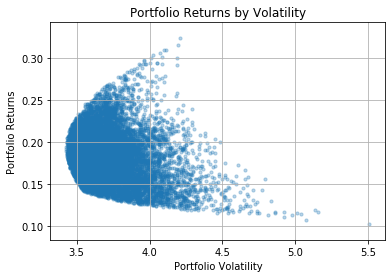

In [29]:
# Plot Returns by Volatility
portfolio_scatter = portfolios.plot.scatter(x='Portfolio Volatility', y='Portfolio Returns', title='Portfolio Returns by Volatility', marker='o', s=10, alpha=0.3, grid=True);

# Save Figure
portfolio_scatter.figure.savefig(f"Images/portfolio_scatter.png", bbox_inches='tight')

### Does returns and volatility have a positive or negative correlation?

# Sharpe Ratios

## Definition: average return earned beyond the risk-free rate per unit of volatility, the measure of the price fluctuations of an asset. The greater the value of the Sharpe ratio, the more attractive the risk-adjusted return.

## Purpose: The ratio describes the compensation an investor will receive for the extra volatility endured when holding a riskier asset.

In [30]:
# Assign Sharpe Ratio Input
sharpe_input = portfolio_close.pct_change().dropna()

# Calculate Annualized Sharpe Ratios
sharpe_ratios = (sharpe_input.mean()*252) / (sharpe_input.std()*np.sqrt(252))

# Show results
for x in range(len(sharpe_ratios)):
    
    # Print Sharpe Ratios
    print(f"The Sharpe Ratio of {get_symbol(stock_list[x])} is {round(sharpe_ratios[x],2)}")

The Sharpe Ratio of Citigroup Inc. is 0.27
The Sharpe Ratio of Genpact Limited is 0.65
The Sharpe Ratio of Microsoft Corporation is 1.13
The Sharpe Ratio of eBay Inc. is 0.59


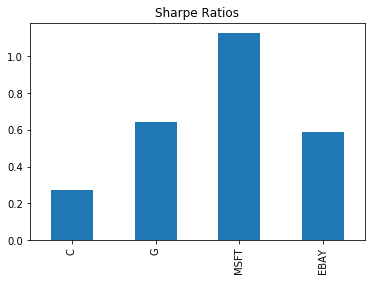

In [31]:
# Visualize Sharpe Ratios as a Bar Plot
sharpe_ratios_plot = sharpe_ratios.plot(kind="bar", title="Sharpe Ratios");

# Save Figure
sharpe_ratios_plot.figure.savefig(f"Images/sharpe_ratios.png", bbox_inches='tight')

### Based on Sharpe Ratios, which stock is the most volatile?